In [1]:
import pandas as pd
import sys


sys.path.append('../')
from src.utils import DATASET_PATH

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Loaded model <class 'torchvision.models.efficientnet.EfficientNet'> to device cpu
Loaded model <class 'torchvision.models.resnet.ResNet'> to device cpu


In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [11]:
import sys
import json
import glob
import os
import random
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats
sys.path.append('../')
from src.statistic import StatisticCollectService
from src.cache import CacheService
from src.vision.iodoorcls import InOutdoorClassifyService
from src.vision.weathercls import WeatherClassifyService
from src.vision.transientrgs import TransientRegressService
from src.vision.geocls import GeolocationClassifyService
from src.external.serpgris import ReverseImageSearchService
from src.external.googlesbi import SearchByImageService
from src.external.freeimagehost import ImageHostService
from src.external.openmeteowr import WeatherRetrieveService

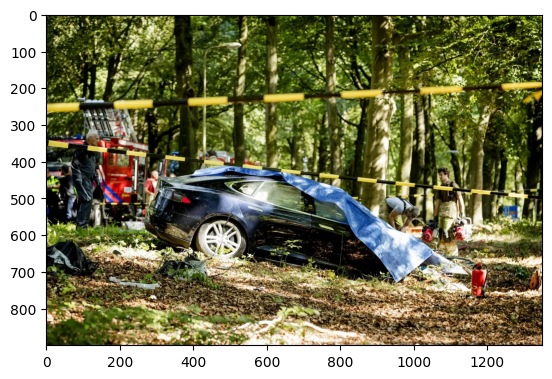

In [23]:
image_path = glob.glob(os.path.join(DATASET_PATH, 'images', '47.*'))[0]

plt.imshow(Image.open(image_path))
plt.show()

In [24]:
StatisticCollectService.get_instance().DEV_STUB = False
SearchByImageService.get_instance().DEBUG = False
CacheService.get_instance().USE_CACHE = False
statistic_data = StatisticCollectService.get_instance().collect(image_path)

In [ ]:
statistic_data

{'search': {'charts': {'frequency_timeline': {'data': {'2022/01': {'count': 0,
      'abnormal': False},
     '2022/02': {'count': 0, 'abnormal': False},
     '2022/03': {'count': 0, 'abnormal': False},
     '2022/04': {'count': 0, 'abnormal': False},
     '2022/05': {'count': 0, 'abnormal': False},
     '2022/06': {'count': 0, 'abnormal': False},
     '2022/07': {'count': 0, 'abnormal': False},
     '2022/08': {'count': 0, 'abnormal': False},
     '2022/09': {'count': 0, 'abnormal': False},
     '2022/10': {'count': 0, 'abnormal': False},
     '2022/11': {'count': 2, 'abnormal': True},
     '2022/12': {'count': 2, 'abnormal': False},
     '2023/01': {'count': 1, 'abnormal': False},
     '2023/02': {'count': 0, 'abnormal': False},
     '2023/03': {'count': 0, 'abnormal': False},
     '2023/04': {'count': 0, 'abnormal': False},
     '2023/05': {'count': 0, 'abnormal': False},
     '2023/06': {'count': 0, 'abnormal': False},
     '2023/07': {'count': 0, 'abnormal': False},
     '2023/08'

In [ ]:
def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

ext = image_path.split('.')[-1]
with open(image_path.replace('images', 'jsons').replace(ext, 'json'), 'w') as jf:
    jf.write(
        json.dumps(statistic_data, default=np_encoder, indent=2))

In [ ]:
CacheService.get_instance().lookup(image_path)

In [ ]:
WeatherRetrieveService.get_instance().DEV_STUB = True
WeatherRetrieveService.get_instance().retrieve(None, None, None)

In [ ]:
uploaed_path = ImageHostService.get_instance().upload(image_path)

In [ ]:
ReverseImageSearchService.get_instance().DEV_STUB = True
ris = ReverseImageSearchService.get_instance().search(image_path)

In [ ]:
sv = InOutdoorClassifyService.get_instance()
predictions = sv.predict(image_path)
print(predictions)

In [ ]:
sv = WeatherClassifyService.get_instance()
prediction = sv.predict(image_path)
print(prediction)

In [ ]:
sv = TransientRegressService.get_instance()
prediction = sv.predict(image_path)
print(prediction)

In [ ]:
sv = GeolocationClassifyService.get_instance()
prediction = sv.predict(image_path)
print(json.dumps(prediction, indent=4))

In [ ]:
statistic_data

In [ ]:
statistic_data['search']['charts']['pg_incl_line_chart']

In [ ]:
import pickle

series = None
with open('sample_series.pkl', 'rb') as inp:
    series = pickle.load(inp)

In [ ]:
# has seasonal features

for t in range(10):
    max_month = random.randint(0, 11)
    max_count = random.randint(50, 200)

    charts = {
        2020: [0]*12,
        2021: [0]*12,
        2022: [0]*12,
    }
    
    for year in charts.keys():
        max_count_year = max_count-random.randint(0, 40)
        max_month_year = min(11, max(0, max_month+random.randint(-1, 1)))
        charts[year][max_month_year] = max_count_year
        if max_month_year < 12:
            for month in range(max_month_year+1, 12):
                charts[year][month] = max(0, charts[year][month-1]-random.randint(-5, 50))
        if max_month_year > 0:
            for month in range(max_month_year-1, -1, -1):
                charts[year][month] = max(0, charts[year][month+1]-random.randint(-5, 50))
    
    index = pd.MultiIndex.from_tuples(
        [(y, m) for m in range(1, 13) for y in [2020, 2021, 2022]],
        names=["year", "month"]
    )
    series = pd.Series(charts[2020]+charts[2021]+charts[2022], index=index).sort_index()
    StatisticCollectService.get_instance().detect_abnormal_time_series(series, visualize=True)

In [ ]:
# not seasonal features

for t in range(10):
    max_count = random.randint(50, 150)

    chart = np.random.randint(low=0, high=max_count, size=12*3)
                
    index = pd.MultiIndex.from_tuples(
        [(y, m) for y in [2020, 2021, 2022] for m in range(1, 13)],
        names=["year", "month"]
    )
    series = pd.Series(chart, index=index)
    StatisticCollectService.get_instance().detect_abnormal_time_series(series, visualize=True)